In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset titanic


df = sns.load_dataset('titanic')


# Preview
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
# Basic info
df.info()

# Summary stats
df.describe()

# Null value check
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
print(df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [36]:
# Mean
print("Mean Values:\n", df[['age', 'fare']].mean(), "\n")

# Median
print("Median Values:\n", df[['age', 'fare']].median(), "\n")

# Mode
print("Mode Values:\n", df[['age', 'fare']].mode().iloc[0], "\n")


Mean Values:
 age    -2.791133e-17
fare    3.987333e-18
dtype: float64 

Median Values:
 age    -0.104637
fare   -0.357391
dtype: float64 

Mode Values:
 age    -0.104637
fare   -0.486337
Name: 0, dtype: float64 



In [58]:
# Strip spaces from column names
df.columns = df.columns.str.strip()

# Verify the column names again
print(df.columns)


Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'class', 'who',
       'adult_male', 'deck', 'embark_town', 'alive', 'alone', 'sex_male',
       'embarked_Q', 'embarked_S'],
      dtype='object')


In [64]:
# Handle missing values
df['age'] = df['age'].fillna(df['age'].median())  # Replace missing 'age' with median
df['embarked_Q'] = df['embarked_Q'].fillna(df['embarked_Q'].mode()[0])  # Replace missing 'embarked_Q' with mode
df['embarked_S'] = df['embarked_S'].fillna(df['embarked_S'].mode()[0])  # Replace missing 'embarked_S' with mode
df['fare'] = df['fare'].fillna(df['fare'].mean())  # Replace missing 'fare' with mean
df

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,sex_male,embarked_Q,embarked_S
0,0,3,-0.565736,1,0,-0.502445,Third,man,True,NaN,Southampton,no,False,True,False,True
1,1,1,0.663861,1,0,0.786845,First,woman,False,C,Cherbourg,yes,False,False,False,False
2,1,3,-0.258337,0,0,-0.488854,Third,woman,False,NaN,Southampton,yes,True,False,False,True
3,1,1,0.433312,1,0,0.420730,First,woman,False,C,Southampton,yes,False,False,False,True
4,0,3,0.433312,0,0,-0.486337,Third,man,True,NaN,Southampton,no,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,-0.181487,0,0,-0.386671,Second,man,True,NaN,Southampton,no,True,True,False,True
887,1,1,-0.796286,0,0,-0.044381,First,woman,False,B,Southampton,yes,True,False,False,True
888,0,3,-0.104637,1,2,-0.176263,Third,woman,False,NaN,Southampton,no,False,False,False,True
889,1,1,-0.258337,0,0,-0.044381,First,man,True,C,Cherbourg,yes,True,True,False,False


In [78]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'sex_male' column
label_encoder = LabelEncoder()
df.loc[:, 'sex'] = label_encoder.fit_transform(df['sex_male'])  # 'male' -> 1, 'female' -> 0
df




,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,sex_male,embarked_S,sex,embarked_Q_True
0,0,3,-0.565736,1,0,-0.502445,Third,man,True,NaN,Southampton,no,False,True,True,1,False
2,1,3,-0.258337,0,0,-0.488854,Third,woman,False,NaN,Southampton,yes,True,False,True,0,False
3,1,1,0.433312,1,0,0.420730,First,woman,False,C,Southampton,yes,False,False,True,0,False
4,0,3,0.433312,0,0,-0.486337,Third,man,True,NaN,Southampton,no,True,True,True,1,False
5,0,3,-0.104637,0,0,-0.478116,Third,man,True,NaN,Queenstown,no,True,True,False,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,-0.181487,0,0,-0.386671,Second,man,True,NaN,Southampton,no,True,True,True,1,False
887,1,1,-0.796286,0,0,-0.044381,First,woman,False,B,Southampton,yes,True,False,True,0,False
888,0,3,-0.104637,1,2,-0.176263,Third,woman,False,NaN,Southampton,no,False,False,True,0,False
889,1,1,-0.258337,0,0,-0.044381,First,man,True,C,Cherbourg,yes,True,True,False,1,False


In [54]:
scaler = StandardScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])
df

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,sex_male,embarked_Q,embarked_S
0,0,3,-0.565736,1,0,-0.502445,Third,man,True,NaN,Southampton,no,False,True,False,True
1,1,1,0.663861,1,0,0.786845,First,woman,False,C,Cherbourg,yes,False,False,False,False
2,1,3,-0.258337,0,0,-0.488854,Third,woman,False,NaN,Southampton,yes,True,False,False,True
3,1,1,0.433312,1,0,0.420730,First,woman,False,C,Southampton,yes,False,False,False,True
4,0,3,0.433312,0,0,-0.486337,Third,man,True,NaN,Southampton,no,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,-0.181487,0,0,-0.386671,Second,man,True,NaN,Southampton,no,True,True,False,True
887,1,1,-0.796286,0,0,-0.044381,First,woman,False,B,Southampton,yes,True,False,False,True
888,0,3,-0.104637,1,2,-0.176263,Third,woman,False,NaN,Southampton,no,False,False,False,True
889,1,1,-0.258337,0,0,-0.044381,First,man,True,C,Cherbourg,yes,True,True,False,False


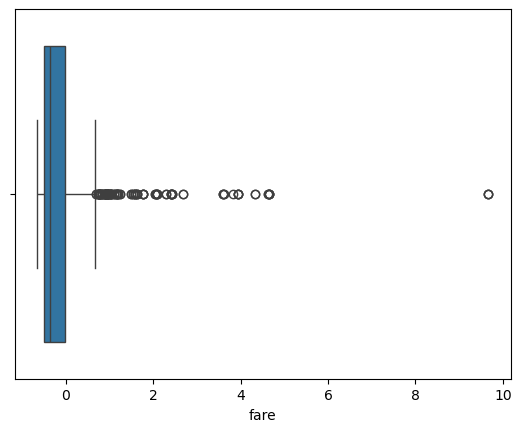

In [66]:
# Boxplot for Fare
sns.boxplot(x=df['fare'])
plt.show()

# Remove outliers using IQR for Fare
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['fare'] >= Q1 - 1.5 * IQR) & (df['fare'] <= Q3 + 1.5 * IQR)]


In [80]:
 check for missing values
print(df.isnull().sum())


survived             0
pclass               0
age                  0
sibsp                0
parch                0
fare                 0
class                0
who                  0
adult_male           0
deck               662
embark_town          0
alive                0
alone                0
sex_male             0
embarked_S           0
sex                  0
embarked_Q_True      0
dtype: int64


In [90]:
# Check if 'Unknown' is already a category in 'deck'
if 'Unknown' not in df['deck'].cat.categories:
    df['deck'] = df['deck'].cat.add_categories('Unknown')

# Fill missing 'deck' values with 'Unknown'
df['deck'] = df['deck'].fillna('Unknown')

# Final check for missing values
print(df.isnull().sum())




survived           0
pclass             0
age                0
sibsp              0
parch              0
fare               0
class              0
who                0
adult_male         0
deck               0
embark_town        0
alive              0
alone              0
sex_male           0
embarked_S         0
sex                0
embarked_Q_True    0
dtype: int64


In [50]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   age          891 non-null    float64 
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   class        891 non-null    category
 7   who          891 non-null    object  
 8   adult_male   891 non-null    bool    
 9   deck         203 non-null    category
 10  embark_town  889 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
 13  sex_male     891 non-null    bool    
 14  embarked_Q   891 non-null    bool    
 15  embarked_S   891 non-null    bool    
dtypes: bool(5), category(2), float64(2), int64(4), object(3)
memory usage: 69.3+ KB


,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,sex_male,embarked_Q,embarked_S
0,0,3,-0.565736,1,0,-0.502445,Third,man,True,NaN,Southampton,no,False,True,False,True
1,1,1,0.663861,1,0,0.786845,First,woman,False,C,Cherbourg,yes,False,False,False,False
2,1,3,-0.258337,0,0,-0.488854,Third,woman,False,NaN,Southampton,yes,True,False,False,True
3,1,1,0.433312,1,0,0.420730,First,woman,False,C,Southampton,yes,False,False,False,True
4,0,3,0.433312,0,0,-0.486337,Third,man,True,NaN,Southampton,no,True,True,False,True
